In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

Using TensorFlow backend.


In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [9]:
# Building Model CNN

model = Sequential()
model.add(Conv1D(filters=100, kernel_size=2, activation='relu', input_shape=(5,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
r = model.fit(x_train.reshape(148, 5, 1), y_train, epochs=1000, validation_data=(x_test.reshape(37, 5, 1), y_test))

Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 0s 2ms/step - loss: 0.5115 - val_loss: 0.6938
Epoch 2/1000
148/148 [==============================] - 0s 238us/step - loss: 0.2062 - val_loss: 0.2655
Epoch 3/1000
148/148 [==============================] - 0s 168us/step - loss: 0.0625 - val_loss: 0.0474
Epoch 4/1000
148/148 [==============================] - 0s 162us/step - loss: 0.0067 - val_loss: 2.1502e-04
Epoch 5/1000
148/148 [==============================] - 0s 141us/step - loss: 0.0054 - val_loss: 0.0135
Epoch 6/1000
148/148 [==============================] - 0s 155us/step - loss: 0.0060 - val_loss: 0.0088
Epoch 7/1000
148/148 [==============================] - 0s 137us/step - loss: 0.0042 - val_loss: 1.1078e-04
Epoch 8/1000
148/148 [==============================] - 0s 191us/step - loss: 0.0023 - val_loss: 0.0069
Epoch 9/1000
148/148 [==============================] - 0s 142us/step - loss: 0.0021 - val_loss: 0.0155
Epoch 10/1000

Epoch 991/1000
148/148 [==============================] - 0s 182us/step - loss: 8.0823e-07 - val_loss: 2.0631e-05
Epoch 992/1000
148/148 [==============================] - 0s 155us/step - loss: 3.8806e-07 - val_loss: 2.7734e-05
Epoch 993/1000
148/148 [==============================] - 0s 154us/step - loss: 3.6134e-07 - val_loss: 1.5094e-05
Epoch 994/1000
148/148 [==============================] - 0s 148us/step - loss: 2.6047e-07 - val_loss: 1.4429e-05
Epoch 995/1000
148/148 [==============================] - 0s 135us/step - loss: 4.9638e-07 - val_loss: 9.8876e-06
Epoch 996/1000
148/148 [==============================] - 0s 148us/step - loss: 3.7035e-07 - val_loss: 5.3078e-06
Epoch 997/1000
148/148 [==============================] - 0s 169us/step - loss: 2.1897e-07 - val_loss: 5.8329e-06
Epoch 998/1000
148/148 [==============================] - 0s 189us/step - loss: 1.1872e-07 - val_loss: 6.0517e-06
Epoch 999/1000
148/148 [==============================] - 0s 168us/step - loss: 1.0182e-

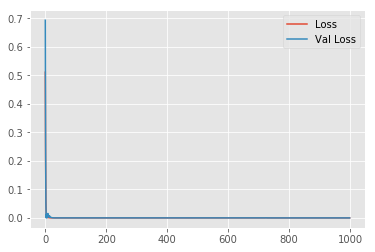

In [42]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [43]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [44]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.00946, 154.01285, 155.01624, 156.0196 , 157.023  , 158.02637,
       159.02975, 160.03314, 161.03653, 162.0399 , 163.04329, 164.04666,
       165.05005, 166.05342, 167.05682, 168.06018, 169.06357, 170.06647,
       171.06932, 172.0729 , 173.07655, 174.08017, 175.08383, 176.08746,
       177.0911 , 178.09473, 179.09837, 180.10202, 181.10565, 182.10928,
       183.11345, 184.11801, 185.12213, 186.12592, 187.12973, 188.13351,
       189.13733], dtype=float32)

In [53]:
# adjusting predicited y_test values by rounding 

np.round(scaler.inverse_transform(result).flatten())

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [52]:
# look into original y_test values

scaler.inverse_transform(y_test).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

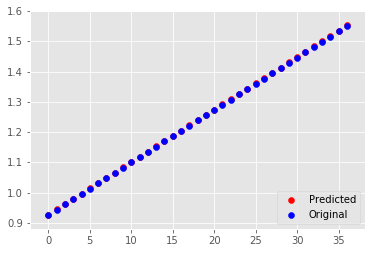

In [45]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

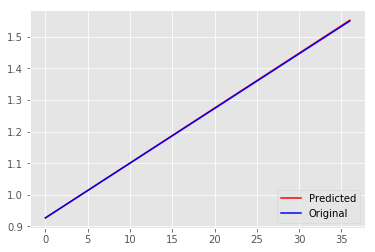

In [46]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [48]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)


X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [49]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [50]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [51]:
# look into original y_test values

scaler.inverse_transform(Y_test).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])